In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
prices = pd.read_csv("stock.csv", parse_dates = ["Date"])

In [3]:
prices.head()

,Date,Open Price,High Price,Low Price,Close Price,Adj Close Price,Volume
0,2014-05-27,87.982857,89.408569,87.947144,89.375717,80.948952,87216500
1,2014-05-28,89.431427,89.975716,89.111427,89.144287,80.739334,78870400
2,2014-05-29,89.692856,90.981430,89.681427,90.768570,82.210480,94118500
3,2014-05-30,91.139999,92.024284,89.842857,90.428574,81.902557,141005200
4,2014-06-02,90.565712,90.690002,88.928574,89.807144,81.339699,92337700


In [4]:
prices.tail()

,Date,Open Price,High Price,Low Price,Close Price,Adj Close Price,Volume
1505,2020-05-18,313.170013,316.500000,310.320007,314.959991,314.959991,33843100
1506,2020-05-19,315.029999,318.519989,313.010010,313.140015,313.140015,25432400
1507,2020-05-20,316.679993,319.519989,316.519989,319.230011,319.230011,27876200
1508,2020-05-21,318.660004,320.890015,315.869995,316.850006,316.850006,25672200
1509,2020-05-22,315.769989,319.230011,315.350006,318.890015,318.890015,20430600


In [5]:
stock= pd.DataFrame()

stock["Date"] = prices["Date"]
stock["Apple"] = prices["Adj Close Price"]

In [6]:
stock["Apple"][:30].mean()
stock["Apple"][1:31].mean()

83.55753913333335

In [7]:
# Short term Simple Moving Average : 30 days
stock["SMA30"] = stock["Apple"].rolling(30).mean()

# long term Simple Moving Average : 100 days
stock["SMA100"] = stock["Apple"].rolling(100).mean()

In [8]:
pd.options.display.max_rows = None

In [9]:
# for i, row in stock[:30].iterrows():
#     print(i,row)

In [10]:
stock.iloc[95:110]

,Date,Apple,SMA30,SMA100
95,2014-10-09,91.950462,91.482005,NaN
96,2014-10-10,91.686493,91.435886,NaN
97,2014-10-13,90.849098,91.354270,NaN
98,2014-10-14,89.884239,91.216219,NaN
99,2014-10-15,88.782898,91.173741,87.780364
100,2014-10-16,87.617805,91.117307,87.847052
101,2014-10-17,88.901215,91.077864,87.928671
102,2014-10-20,90.803581,91.120341,88.014602
103,2014-10-21,93.270294,91.256267,88.128280
104,2014-10-22,93.743599,91.316646,88.252319


In [11]:
def buy_sell(df):
    buy_signal_price = [] # [88.782898]
    sell_signal_price = [] #[np.nan]
    holding = [] # [1,1] # 1 for hold, 0 for not hold
    actions = [] # [1] # 0, -1, 1
    sig = 0 # 1
    
    for i, row in stock.iterrows(): # Condtion 1 : Buy
        if row["SMA30"] > row["SMA100"]: # 91.117307> 87.847052
            holding.append(1)
            if sig != 1:
                buy_signal_price.append(row["Apple"])
                sell_signal_price.append(np.nan)
                sig = 1
                actions.append(sig)
            else:
                buy_signal_price.append(np.nan)
                sell_signal_price.append(np.nan)
                actions.append(0)
        
        elif row["SMA30"] < row["SMA100"]:
            holding.append(0)
            if sig != -1:
                buy_signal_price.append(np.nan)
                sell_signal_price.append(row["Apple"])
                sig = -1
                actions.append(sig)
            else:
                buy_signal_price.append(np.nan)
                sell_signal_price.append(np.nan)
                actions.append(0)
        else:
            holding.append(0)
            buy_signal_price.append(np.nan)
            sell_signal_price.append(np.nan)
            actions.append(0)
        
    return buy_signal_price, sell_signal_price, holding, actions

In [12]:
buysell = buy_sell(stock)

In [13]:
stock["Buy Price"] = buysell[0]
stock["Sell Price"] = buysell[1]
stock["Hold"] = buysell[2]
stock["Actions"] = buysell[3]

In [14]:
stock

,Date,Apple,SMA30,SMA100,Buy Price,Sell Price,Hold,Actions
0,2014-05-27,80.948952,NaN,NaN,NaN,NaN,0,0
1,2014-05-28,80.739334,NaN,NaN,NaN,NaN,0,0
2,2014-05-29,82.210480,NaN,NaN,NaN,NaN,0,0
3,2014-05-30,81.902557,NaN,NaN,NaN,NaN,0,0
4,2014-06-02,81.339699,NaN,NaN,NaN,NaN,0,0
5,2014-06-03,82.489952,NaN,NaN,NaN,NaN,0,0
6,2014-06-04,83.431915,NaN,NaN,NaN,NaN,0,0
7,2014-06-05,83.759270,NaN,NaN,NaN,NaN,0,0
8,2014-06-06,83.528938,NaN,NaN,NaN,NaN,0,0
9,2014-06-09,84.865509,NaN,NaN,NaN,NaN,0,0


In [15]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


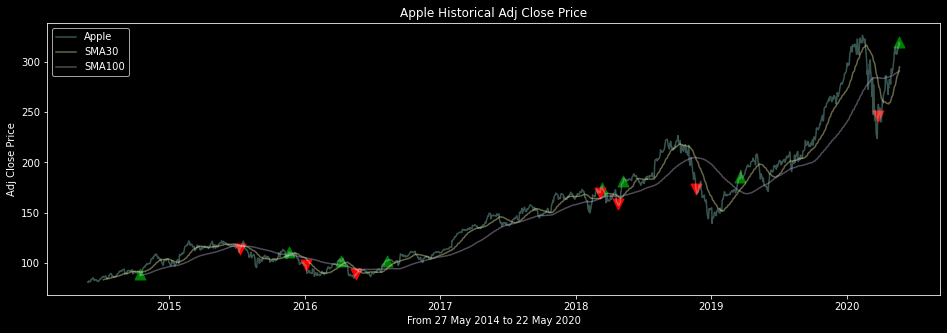

In [23]:
plt.figure(figsize=(16,5))
plt.style.use("dark_background")

plt.plot(stock["Date"], stock["Apple"], label = "Apple", alpha = 0.4)
plt.plot(stock["Date"], stock["SMA30"], label = "SMA30", alpha = 0.4)
plt.plot(stock["Date"], stock["SMA100"], label = "SMA100", alpha = 0.4)

plt.scatter(stock["Date"],stock["Buy Price"], color = "green", marker = "^", s = 120)
plt.scatter(stock["Date"],stock["Sell Price"], color = "red", marker = "v", s = 120)

plt.title("Apple Historical Adj Close Price")
plt.xlabel("From 27 May 2014 to 22 May 2020")
plt.ylabel("Adj Close Price")

plt.legend()
plt.show()